#Thinkful Data Science Course
##Unit 4: Predicting the Future; 
##Lesson 7: Dimensionality Reduction

Two topics covered in this lesson: data dimensionality reduction and data preprocessing. Dimensionality reduction aims to produce a compact low-dimensional "encoding" of a high-dimensional data set, while data preprocessing aims to simplify, reduce and clean data for subsequent training.

We examine the aptly named curse of dimensionality. Suppose our data consists of 1000 datapoints uniformly distributed in a unit cube, and that we wish to apply 10-Nearest-Neighbors on this dataset. In 2 dimensions (2 independent variables), on average we must go a distance of sqrt(10/1000)=.1 to find 10 points (i.e. capturing 1% of the volume of this cube). As we increase the number of independent variables, the average distance between points in a neighborhood “blows up”; with just 10 dimensions we must go a distance of (10/1000)^(1/10) = .954 to capture 10 points. In other words, our neighborhood already contains 95% of the total possible volume with just 10 datapoints, and it is no longer informative.

In addition to the example above, here are some other situations in which we'd want to reduce the dimensionality of our data include:

-If the data contain redundancy (multiple features encode the same information)

-To eliminate features that are redundant and extract those which are more central to the phenomenon we are trying to learn,

-If the data contain irrelevent or noisy features that could negatively impact a learning algorithm's performance

-To more effectively visualize relationships between features

-To address computational resource constraints



In this lesson we study two techniques for reducing the dimensionality of data in different ways:

-feature transform: determines the dependencies between features and finds a new set of feature vectors with lower dimensionality (because it captures multiple original feature vectors in one) while also preserving the characteristics of the original feature vectors.

-feature selection: determines the relevant features for a given learning problem. Instead of creating a new feature set through transformations, feature selection simply subsets the feature set based on some criteria of relevance.

Principal Component Analysis (PCA) is the most basic and most common feature transform used in feature extraction and dimensionality reduction. It is easy to train, and has additional functionalities like noise reduction.

PCA is an unsupervised learning process. For supervised learning, not only do we want to preserve the variances across features in the data, we also want to preserve the relationships between features and labels. Linear Discriminant Analysis (LDA) takes the labeling into account (essentially considering it as an additional feature vector).

-Review the sklearn PCA example with Iris Dataset

-Review the sklearn Comparison of LDA and PCA 2D Projection of Iris Dataset

-Plot the Iris Dataset by two attributes that you found to cluster well in Lesson 2, and color by species.

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.lda import LDA

In [2]:
iris_df = pd.DataFrame()

In [3]:
iris_df['sepal_length'] = iris.data[:,0]
iris_df['sepal_width'] = iris.data[:,1]
iris_df['petal_length'] = iris.data[:,2]
iris_df['petal_width'] = iris.data[:,3]
iris_df['target'] = iris.target
iris_df['target_flower'] = iris.target
iris_df['target_flower'].replace(0, 'setosa', inplace = True)
iris_df['target_flower'].replace(1, 'versicolor', inplace = True)
iris_df['target_flower'].replace(2, 'virginica', inplace = True)
iris_df1 = iris_df[iris_df['target_flower']=='setosa']
iris_df2 = iris_df[iris_df['target_flower']=='versicolor']
iris_df3 = iris_df[iris_df['target_flower']=='virginica']

####Plot the Iris Dataset by two attributes that you found to cluster well in Lesson 2, and color by species.

In [4]:
%matplotlib inline

<function matplotlib.pyplot.show>

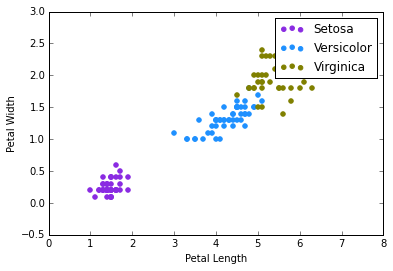

In [5]:
plt.scatter(iris_df1['petal_length'], iris_df1['petal_width'], label = 'Setosa', color='blueviolet')
plt.scatter(iris_df2['petal_length'], iris_df2['petal_width'], label = 'Versicolor', color='dodgerblue')
plt.scatter(iris_df3['petal_length'], iris_df3['petal_width'], label = 'Virginica', color='olive')
plt.legend()
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show

###PCA

In [12]:
target_names = iris.target_names

In [26]:
X = iris_df[['petal_length', 'petal_width']].as_matrix()
y = iris_df['target'].as_matrix()

In [27]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

In [28]:
pca

PCA(copy=True, n_components=2, whiten=False)

In [29]:
X_r

array([[ -2.56137133e+00,  -4.52592338e-03],
       [ -2.56137133e+00,  -4.52592338e-03],
       [ -2.65352602e+00,   3.43007710e-02],
       [ -2.46921663e+00,  -4.33526177e-02],
       [ -2.56137133e+00,  -4.52592338e-03],
       [ -2.20725385e+00,   6.33033836e-02],
       [ -2.52254463e+00,   8.76287716e-02],
       [ -2.46921663e+00,  -4.33526177e-02],
       [ -2.56137133e+00,  -4.52592338e-03],
       [ -2.50804333e+00,  -1.35507313e-01],
       [ -2.46921663e+00,  -4.33526177e-02],
       [ -2.37706194e+00,  -8.21793121e-02],
       [ -2.60019802e+00,  -9.66806184e-02],
       [ -2.87666211e+00,   1.97994647e-02],
       [ -2.74568072e+00,   7.31274653e-02],
       [ -2.39156324e+00,   1.40956772e-01],
       [ -2.57587263e+00,   2.18610161e-01],
       [ -2.52254463e+00,   8.76287716e-02],
       [ -2.24608055e+00,  -2.88513114e-02],
       [ -2.43038994e+00,   4.88020773e-02],
       [ -2.28490724e+00,  -1.21006006e-01],
       [ -2.39156324e+00,   1.40956772e-01],
       [ -

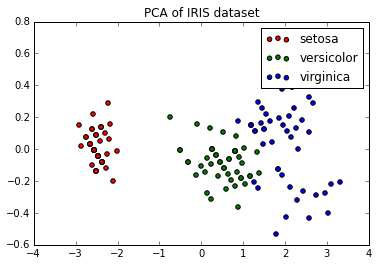

In [30]:
plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()

####Original Plot:
How does it compare to the original?

<function matplotlib.pyplot.show>

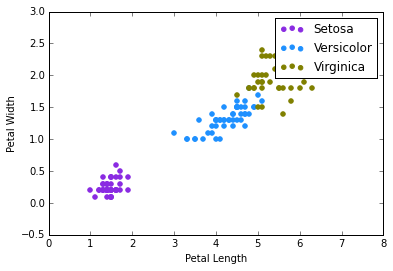

In [31]:
plt.scatter(iris_df1['petal_length'], iris_df1['petal_width'], label = 'Setosa', color='blueviolet')
plt.scatter(iris_df2['petal_length'], iris_df2['petal_width'], label = 'Versicolor', color='dodgerblue')
plt.scatter(iris_df3['petal_length'], iris_df3['petal_width'], label = 'Virginica', color='olive')
plt.legend()
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show

####Retrain the k-nearest neighbors algorithm from Lesson 5 on the decomposed dataset.

In [41]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=6)
pcd_val = neigh.fit(X_r,y).predict(X_r)
pcd_val

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

####Compare the performance on the decomposed dataset to the performance on the raw dataset. Does anything stand out?

In [44]:
test_table = pd.DataFrame()

In [52]:
test_table['target'] = iris_df['target']
test_table['pcd_val'] = pcd_val
test_table['pcd_compare'] = test_table['target']==test_table['pcd_val']
test_table

,target,pcd_val,pcd_compare
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,0,0,True
5,0,0,True
6,0,0,True
7,0,0,True
8,0,0,True
9,0,0,True


In [53]:
sum(test_table['pcd_compare'])

145

In [55]:
print('Out of 150 values,', sum(test_table['pcd_compare']), 'of them were correctly matched, which is a success rate of ', ((sum(test_table['pcd_compare']))/150)*100, '%.')

Out of 150 values, 145 of them were correctly matched, which is a success rate of  96.6666666667 %.


###LDA

we're going to perform LDA on the Iris Dataset we used earlier in this unit, and see how our k-NN algorithm performs on the decomposed data compared to how it performs on the raw data.

In [33]:
lda = LDA(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

In [34]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.99019934  0.00980066]


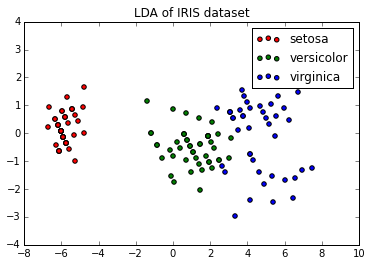

In [35]:
plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('LDA of IRIS dataset')

plt.show()

####Retrain the k-means algorithm from Lesson 4 on the decomposed dataset.

In [40]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=6)
lda_val = neigh.fit(X_r2,y).predict(X_r2)
lda_val

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

####Compare the performance on the decomposed dataset to the performance on the raw dataset. Does anything stand out?

In [56]:
test_table['lda_val'] = lda_val
test_table['lda_compare'] = test_table['target']==test_table['lda_val']
test_table

,target,pcd_val,pcd_compare,lda_val,lda_compare
0,0,0,True,0,True
1,0,0,True,0,True
2,0,0,True,0,True
3,0,0,True,0,True
4,0,0,True,0,True
5,0,0,True,0,True
6,0,0,True,0,True
7,0,0,True,0,True
8,0,0,True,0,True
9,0,0,True,0,True


In [57]:
print('Out of 150 values,', sum(test_table['lda_compare']), 'of them were correctly matched, which is a success rate of ', ((sum(test_table['lda_compare']))/150)*100, '%.')

Out of 150 values, 147 of them were correctly matched, which is a success rate of  98.0 %.


###Notes

Both Linear Discriminant Analysis (LDA) and Principal Component Analysis (PCA) are linear transformation techniques that are commonly used for dimensionality reduction. PCA can be described as an "unsupervised" algorithm, since it "ignores" class labels and its goal is to find the directions (the so-called principal components) that maximize the variance in a dataset. In contrast to PCA, LDA is "supervised" and computes the directions ("linear discriminants") that will represent the axes that maximize the separation between multiple classes.

Although it might sound intuitive that LDA is superior to PCA for a multi-class classification task where the class labels are known, this might not always be the case.
For example, comparisons between classification accuracies for image recognition after using PCA or LDA show that PCA tends to outperform LDA if the number of samples per class is relatively small (PCA vs. LDA, A.M. Martinez et al., 2001). In practice, it is also not uncommon to use both LDA and PCA in combination: E.g., PCA for dimensionality reduction followed by an LDA.

####Good sites for explanation:

Principal Component Analysis 4 Dummies: Eigenvectors, Eigenvalues and Dimension Reduction:
https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/

Principal Component Analysis in 3 Simple Steps:
http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html

Linear Discriminant Analysis bit by bit:
http://sebastianraschka.com/Articles/2014_python_lda.html

